IMPORTING THE LIBRARIES

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

LOADING THE DATASET 

In [8]:
bee = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\Arewa DS&ML\ArewaDS-Machine-Learning\data\honey.csv')

In [9]:
print(bee.shape)

(626, 8)


In [10]:
bee.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


DATA CLEANING AND PREPARATION

In [12]:
# Check for missing values
print(bee.isnull().sum())

# Handle missing values if any (example)
bee = bee.dropna()  # or use appropriate imputation

# Convert year to datetime if needed
bee['year'] = pd.to_datetime(bee['year'], format='%Y')

# Create a decade column for broader time period analysis
bee['decade'] = (bee['year'].dt.year // 10) * 10

# Verify data types
print(bee.dtypes)

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64
state                  object
numcol                float64
yieldpercol             int64
totalprod             float64
stocks                float64
priceperlb            float64
prodvalue             float64
year           datetime64[ns]
decade                  int32
dtype: object


EXPLORATORY DATA ANALYSIS

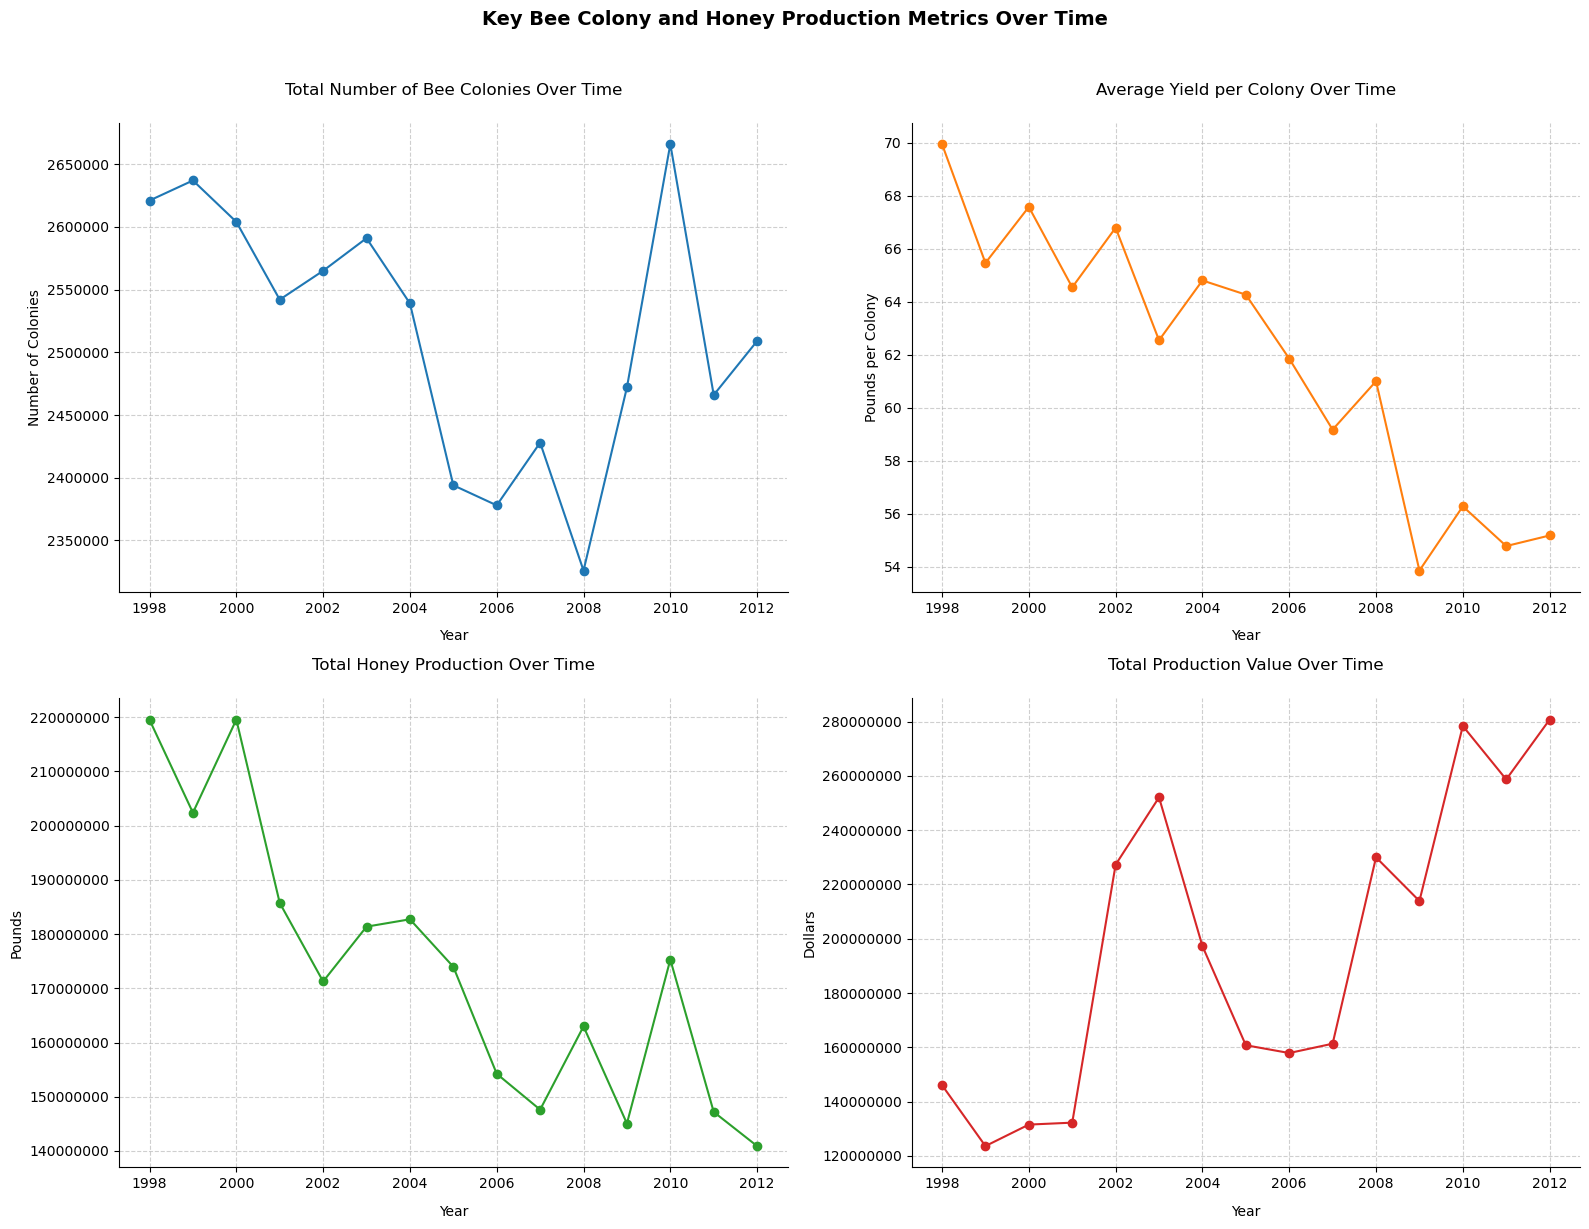

In [14]:

try:
    # Group by year and calculate aggregates
    yearly_stats = bee.groupby(bee['year'].dt.year).agg({
        'numcol': 'sum',
        'yieldpercol': 'mean',
        'totalprod': 'sum',
        'prodvalue': 'sum'
    }).reset_index()

    # Create the figure and axes
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Number of colonies
    axes[0, 0].plot(yearly_stats['year'], yearly_stats['numcol'], marker='o', color='#1f77b4')
    axes[0, 0].set_title('Total Number of Bee Colonies Over Time', pad=20)
    axes[0, 0].set_ylabel('Number of Colonies')
    axes[0, 0].grid(True, linestyle='--', alpha=0.6)
    
    # Plot 2: Yield per colony
    axes[0, 1].plot(yearly_stats['year'], yearly_stats['yieldpercol'], 
                   marker='o', color='#ff7f0e')
    axes[0, 1].set_title('Average Yield per Colony Over Time', pad=20)
    axes[0, 1].set_ylabel('Pounds per Colony')
    axes[0, 1].grid(True, linestyle='--', alpha=0.6)
    
    # Plot 3: Total production
    axes[1, 0].plot(yearly_stats['year'], yearly_stats['totalprod'], 
                   marker='o', color='#2ca02c')
    axes[1, 0].set_title('Total Honey Production Over Time', pad=20)
    axes[1, 0].set_ylabel('Pounds')
    axes[1, 0].grid(True, linestyle='--', alpha=0.6)
    
    # Plot 4: Production value
    axes[1, 1].plot(yearly_stats['year'], yearly_stats['prodvalue'], 
                   marker='o', color='#d62728')
    axes[1, 1].set_title('Total Production Value Over Time', pad=20)
    axes[1, 1].set_ylabel('Dollars')
    axes[1, 1].grid(True, linestyle='--', alpha=0.6)

    # Common settings for all axes
    for ax in axes.flat:
        ax.set_xlabel('Year', labelpad=10)
        ax.ticklabel_format(style='plain')  # Prevent scientific notation
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    plt.suptitle('Key Bee Colony and Honey Production Metrics Over Time', 
                y=1.02, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

except KeyboardInterrupt:
    print("Plotting interrupted by user")
except Exception as e:
    print(f"An error occurred while plotting: {str(e)}")

STATE BY STATE ANALYSIS

C:\Users\User\AppData\Local\Temp\ipykernel_6676\783332041.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_changes = bee.groupby('state').apply(


States with Largest Colony Declines:
state
CA   -120000.0
FL    -37000.0
AZ    -33000.0
WI    -29000.0
AR    -28000.0
ID    -28000.0
NE    -21000.0
GA    -16000.0
MO    -16000.0
MN    -15000.0
dtype: float64

States with Largest Colony Increases:
state
KY      2000.0
HI      2000.0
NJ      3000.0
WA      4000.0
WY      4000.0
NC      5000.0
OR     10000.0
MT     30000.0
SD     35000.0
ND    250000.0
dtype: float64


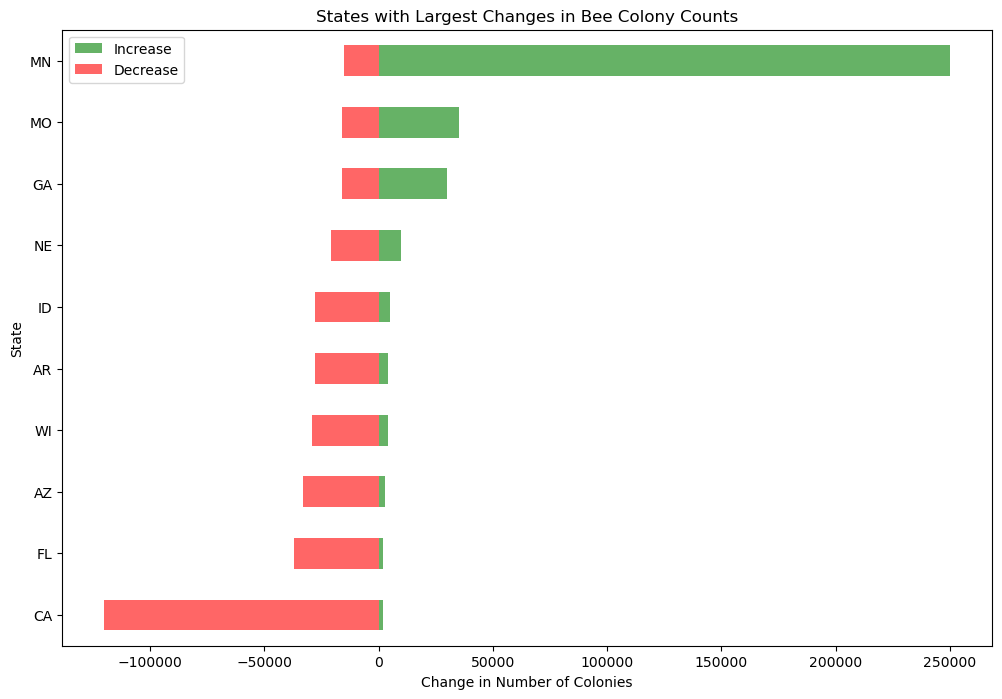

In [15]:
# Top and bottom states by colony count changes
state_changes = bee.groupby('state').apply(
    lambda x: x[x['year'] == x['year'].max()]['numcol'].values[0] - 
              x[x['year'] == x['year'].min()]['numcol'].values[0]
).sort_values()

print("States with Largest Colony Declines:")
print(state_changes.head(10))

print("\nStates with Largest Colony Increases:")
print(state_changes.tail(10))

# Visualize top and bottom states
plt.figure(figsize=(12, 8))
state_changes.tail(10).plot(kind='barh', color='green', alpha=0.6, label='Increase')
state_changes.head(10).plot(kind='barh', color='red', alpha=0.6, label='Decrease')
plt.title('States with Largest Changes in Bee Colony Counts')
plt.xlabel('Change in Number of Colonies')
plt.ylabel('State')
plt.legend()
plt.show()

CORRELATION ANALYSIS

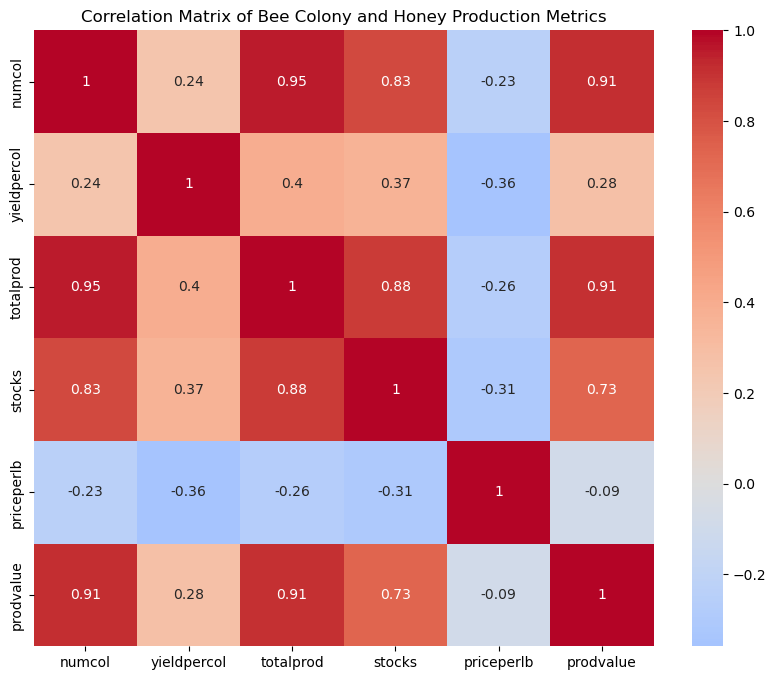

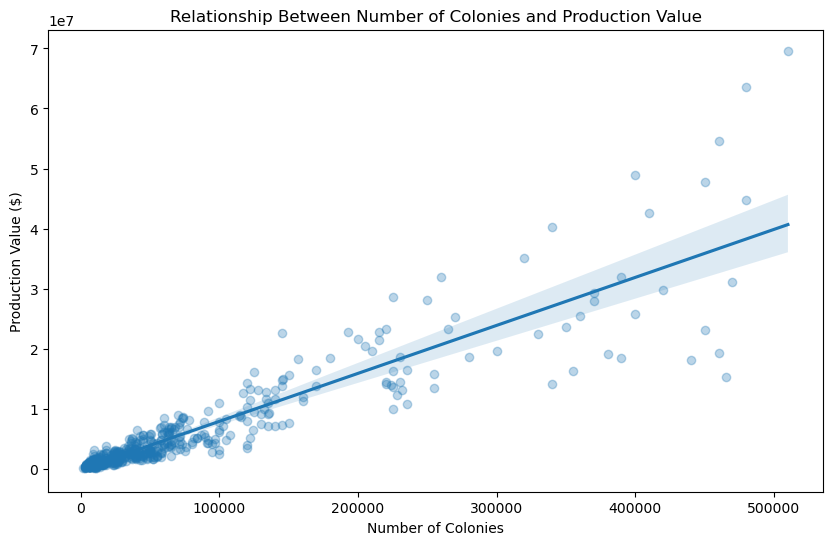

In [17]:
# Calculate correlations between variables
corr_matrix = bee[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Bee Colony and Honey Production Metrics')
plt.show()

# Scatter plot of colonies vs production value with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='numcol', y='prodvalue', data=bee, scatter_kws={'alpha':0.3})
plt.title('Relationship Between Number of Colonies and Production Value')
plt.xlabel('Number of Colonies')
plt.ylabel('Production Value ($)')
plt.show()

COLONY HEALTH ANALYSIS

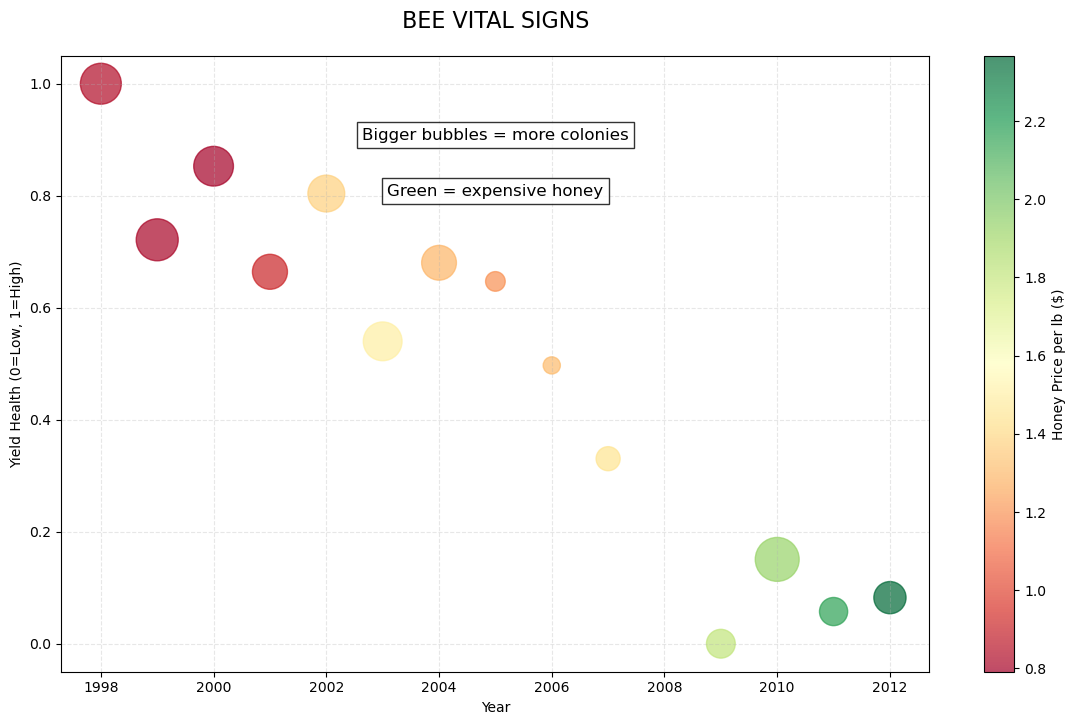

In [21]:
from matplotlib import cm

# Prepare data
metrics = bee.groupby(bee['year'].dt.year).agg({
    'numcol': 'sum',
    'yieldpercol': 'mean',
    'priceperlb': 'mean'
}).reset_index()

# Normalize metrics (0-1 scale)
metrics['numcol_norm'] = (metrics['numcol'] - metrics['numcol'].min()) / (metrics['numcol'].max() - metrics['numcol'].min())
metrics['yield_norm'] = (metrics['yieldpercol'] - metrics['yieldpercol'].min()) / (metrics['yieldpercol'].max() - metrics['yieldpercol'].min())

# Plot as bubble chart
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    x=metrics['year'],
    y=metrics['yield_norm'],
    s=metrics['numcol_norm'] * 1000,  # Bubble size = colony count
    c=metrics['priceperlb'],
    cmap='RdYlGn',  # Red-Yellow-Green color for prices
    alpha=0.7
)

# Add labels
plt.colorbar(scatter, label='Honey Price per lb ($)')
plt.title(" BEE VITAL SIGNS ", fontsize=16, pad=20)
plt.xlabel("Year")
plt.ylabel("Yield Health (0=Low, 1=High)")
plt.grid(True, linestyle='--', alpha=0.3)

# Add dumb-proof annotations
plt.annotate(
    "Bigger bubbles = more colonies", 
    xy=(metrics['year'].median(), 0.9), 
    ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.annotate(
    "Green = expensive honey", 
    xy=(metrics['year'].median(), 0.8), 
    ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

PREDICTIVE ANALYSIS USING LINEAR REGRESSION

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# 1. Remove extreme outliers (top/bottom 2%)
q_low = bee['totalprod'].quantile(0.02)
q_high = bee['totalprod'].quantile(0.98)
bee = bee[(bee['totalprod'] > q_low) & (bee['totalprod'] < q_high)]

# 2. Feature engineering
bee['prod_per_colony'] = bee['totalprod'] / bee['numcol']

# Ensure 'year' is numeric
bee['year_num'] = bee['year'].dt.year

# Select features
features = ['numcol', 'yieldpercol', 'stocks', 'priceperlb', 'year_num', 'prod_per_colony']
X = bee[features]
y = bee['totalprod']

# 3. Use robust scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on first 5 rows
X_pred = bee.head(5).copy()
X_pred['year_num'] = X_pred['year'].dt.year
X_pred = X_pred[features]
X_pred_scaled = scaler.transform(X_pred)
predictions = model.predict(X_pred_scaled)
actual = bee.head(5)['totalprod'].values

# Calculate improved metrics
mae = mean_absolute_error(actual, predictions)
mape = np.mean(np.abs((actual - predictions) / actual)) * 100

print("\nRESULTS:")
print(f"Accuracy (MAE): {mae:,.0f} lbs  (Lower is better)")
print(f"Precision (MAPE): {mape:.1f}%  (Closer to 0% is better)")

print("\nSample Predictions:")
for i, (pred, true) in enumerate(zip(predictions, actual)):
    print(f"Row {i+1}: Predicted {pred:,.0f} lbs | Actual {true:,.0f} lbs | Error: {(true-pred)/true*100:.1f}%")


RESULTS:
Accuracy (MAE): 31,264 lbs  (Lower is better)
Precision (MAPE): 1.5%  (Closer to 0% is better)

Sample Predictions:
Row 1: Predicted 1,081,870 lbs | Actual 1,136,000 lbs | Error: 4.8%
Row 2: Predicted 3,261,840 lbs | Actual 3,300,000 lbs | Error: 1.2%
Row 3: Predicted 3,474,790 lbs | Actual 3,445,000 lbs | Error: -0.9%
Row 4: Predicted 1,942,320 lbs | Actual 1,944,000 lbs | Error: 0.1%
Row 5: Predicted 4,167,440 lbs | Actual 4,200,000 lbs | Error: 0.8%


 MODEL PERFORMANCE 
Train R²  : 1.00
Test R²   : 0.99
Test MAE  : 144352.89
Error %   : 6.33%


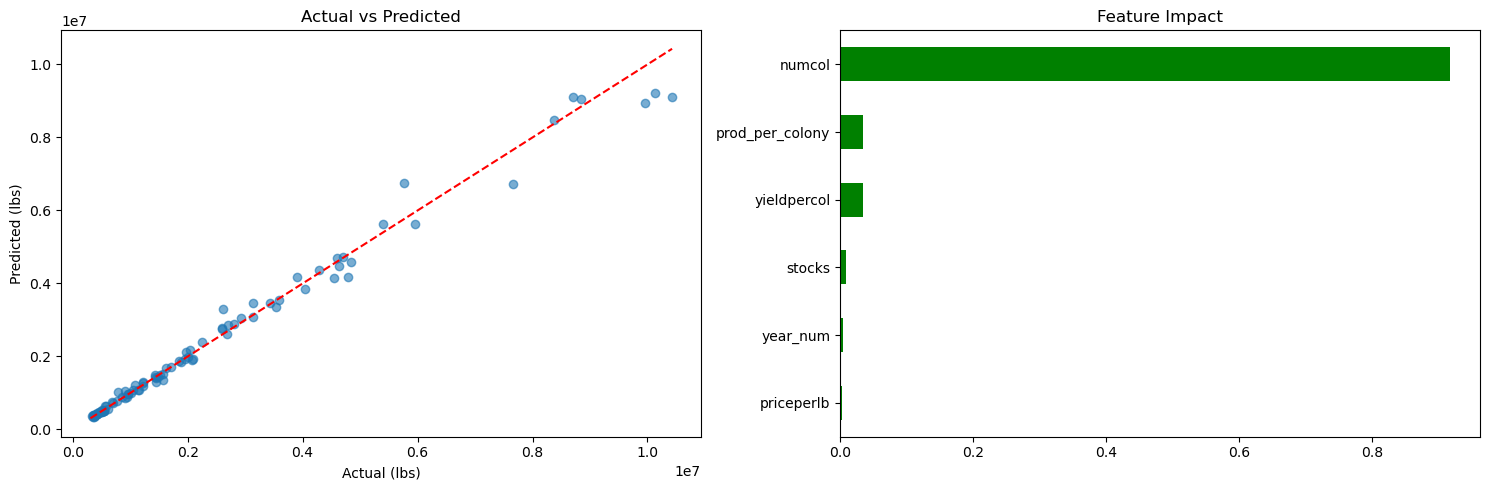

In [45]:
# Performance Metrics (Compact)
metrics = {
    "Train R²": r2_score(y_train, model.predict(X_train)),
    "Test R²": r2_score(y_test, test_pred := model.predict(X_test)),
    "Test MAE": mean_absolute_error(y_test, test_pred),
    "Error %": mean_absolute_error(y_test, test_pred)/y_test.mean()*100
}

print(" MODEL PERFORMANCE ")
print("\n".join(f"{k:<10}: {v:.2f}{'%' if k=='Error %' else ''}" for k,v in metrics.items()))

# Combined Visual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Actual vs Predicted
ax1.scatter(y_test, test_pred, alpha=0.6)
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
ax1.set(title="Actual vs Predicted", xlabel="Actual (lbs)", ylabel="Predicted (lbs)")

# Feature Importance
imp = pd.Series(model.feature_importances_, index=X.columns).sort_values()
imp.plot(kind='barh', ax=ax2, color='g')
ax2.set(title="Feature Impact");

plt.tight_layout()
plt.show()